In [5]:
import os, sys, warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [ ]:
from gan_ids_project.src.utils.utils import load_data, make_synthetic_data, train_and_evaluate_model
from gan_ids_project.src.gan.models import NetworkAnomalyDetector, DeeperNetworkAnomalyDetector
from gan_ids_project.src.gan.data_augmentors import CTGANAugmentor, TVAEAugmentor

# UNSW-NB15 Dataset

## Binary

No GAN augmentor specified. Using original data.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1526
Epoch 2/15, Loss: 0.1257
Epoch 3/15, Loss: 0.1207
Epoch 4/15, Loss: 0.1178
Epoch 5/15, Loss: 0.1155
Epoch 6/15, Loss: 0.1138
Epoch 7/15, Loss: 0.1122
Epoch 8/15, Loss: 0.1111
Epoch 9/15, Loss: 0.1100
Epoch 10/15, Loss: 0.1092
Epoch 11/15, Loss: 0.1082
Epoch 12/15, Loss: 0.1075
Epoch 13/15, Loss: 0.1067
Epoch 14/15, Loss: 0.1061
Epoch 15/15, Loss: 0.1061

Test Accuracy: 84.66%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.69      0.80     36978
           1       0.79      0.98      0.88     45332

    accuracy                           0.85     82310
   macro avg       0.88      0.83      0.84     82310
weighted avg       0.87      0.85      0.84     82310



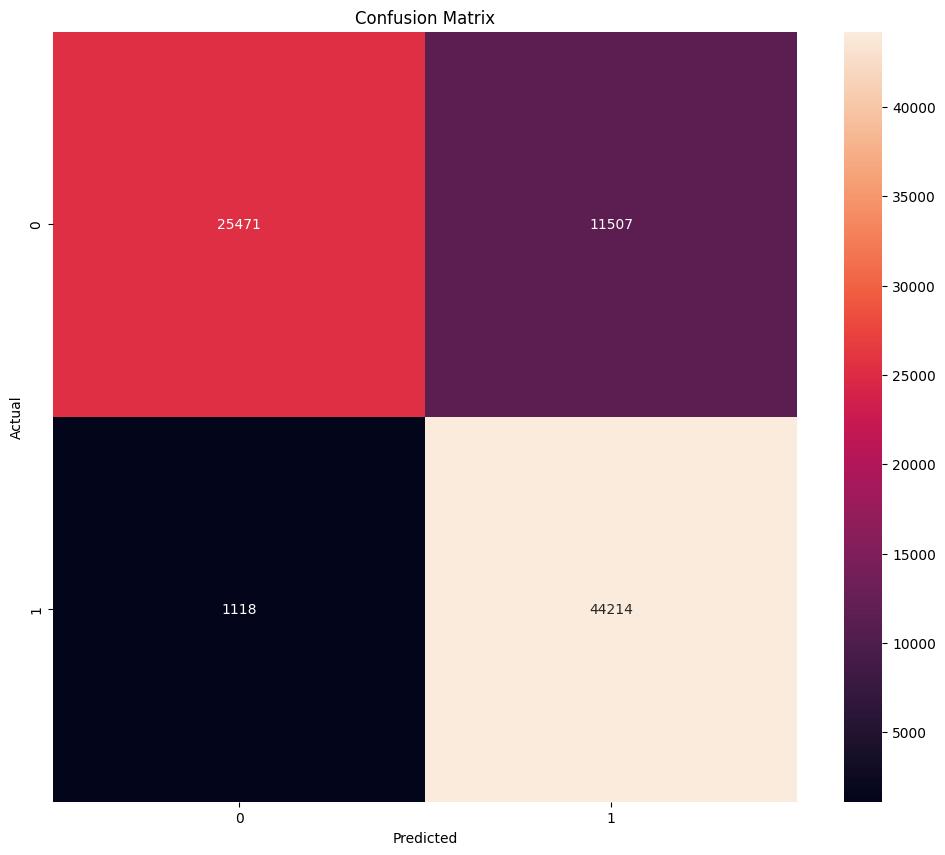

Generating synthetic data for category: 0
Metadata error for 0: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
No synthetic data generated.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1526
Epoch 2/15, Loss: 0.1275
Epoch 3/15, Loss: 0.1217
Epoch 4/15, Loss: 0.1189
Epoch 5/15, Loss: 0.1166
Epoch 6/15, Loss: 0.1153
Epoch 7/15, Loss: 0.1134
Epoch 8/15, Loss: 0.1123
Epoch 9/15, Loss: 0.1115
Epoch 10/15, Loss: 0.1099
Epoch 11/15, Loss: 0.1094
Epoch 12/15, Loss: 0.1084
Epoch 13/15, Loss: 0.1075
Epoch 14/15, Loss: 0.1067
Epoch 15/15, Loss: 0.1064

Test Accuracy: 86.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.73      0.82     36978
           1       0.81      0.97      0.88     45332

    accuracy                           0.86     82310
   macro avg       0.88      0.85      0.85     82310
weighted avg       0.87      0.86      0.86     82

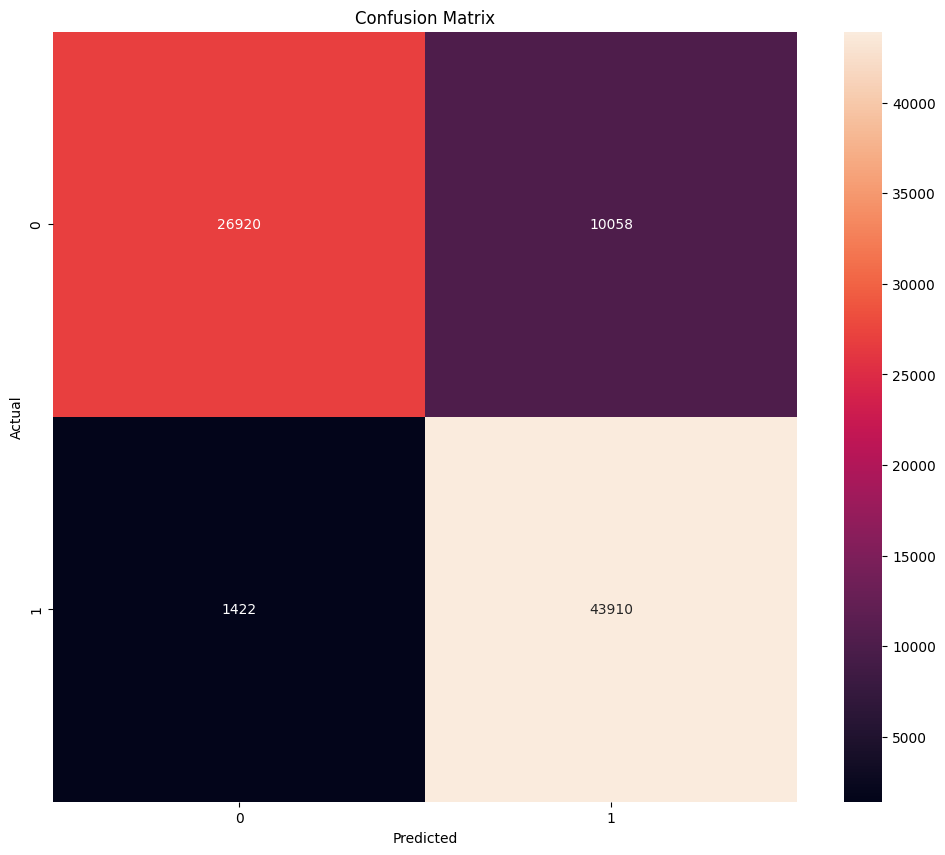

Generating synthetic data for category: 0
Metadata error for 0: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
No synthetic data generated.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.1539
Epoch 2/15, Loss: 0.1289
Epoch 3/15, Loss: 0.1232
Epoch 4/15, Loss: 0.1194
Epoch 5/15, Loss: 0.1167
Epoch 6/15, Loss: 0.1149
Epoch 7/15, Loss: 0.1131
Epoch 8/15, Loss: 0.1119
Epoch 9/15, Loss: 0.1107
Epoch 10/15, Loss: 0.1098
Epoch 11/15, Loss: 0.1089
Epoch 12/15, Loss: 0.1082
Epoch 13/15, Loss: 0.1072
Epoch 14/15, Loss: 0.1070
Epoch 15/15, Loss: 0.1063

Test Accuracy: 86.36%

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.73      0.83     36978
           1       0.82      0.97      0.89     45332

    accuracy                           0.86     82310
   macro avg       0.89      0.85      0.86     82310
weighted avg       0.88      0.86      0.86     

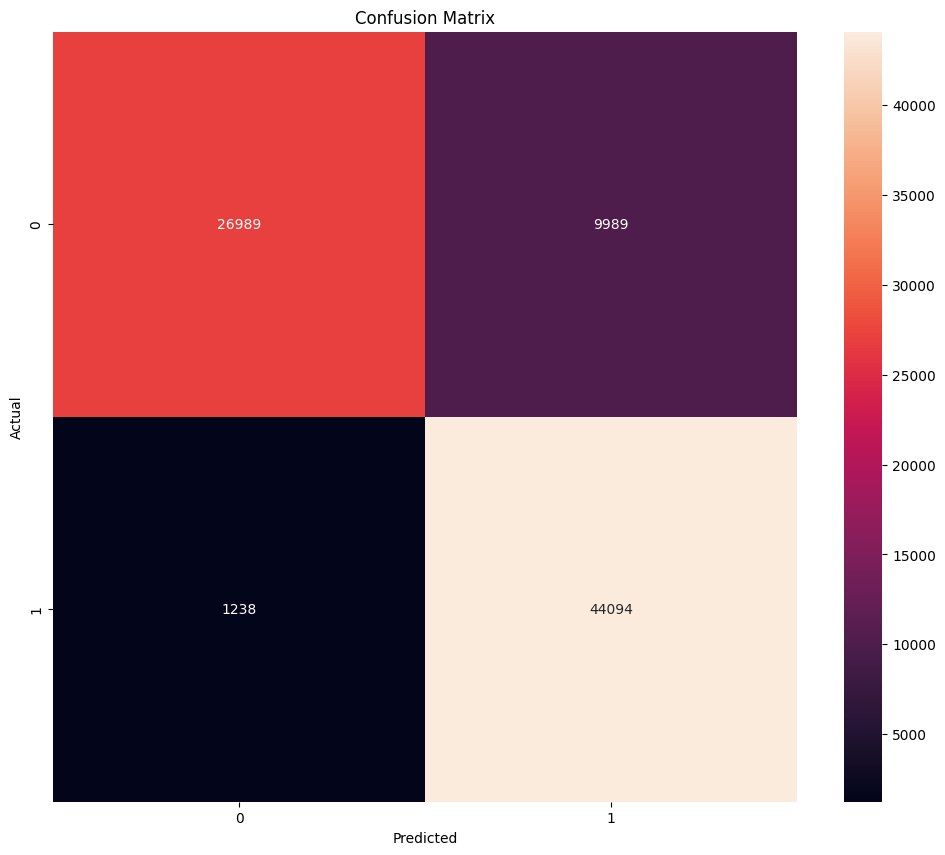

In [7]:
dataset = "UNSW-NB15"                       # "UNSW-NB15" is smaller, "NF-ToN-IoT-v1" is larger
target_variable = 'Label'                  #  "Label" for binary, "Attack" for multi class
augmentor_ctgan = CTGANAugmentor()
augmentor_ctgan.minority_threshold = 100000

augmentor_tvae = TVAEAugmentor()
augmentor_tvae.minority_threshold = 100000

augmentors = [None, augmentor_ctgan, augmentor_tvae] 
model_type = DeeperNetworkAnomalyDetector   # NetworkAnomalyDetector, DeeperNetworkAnomalyDetector

X_train, X_test, y_train, y_test = load_data(dataset, target_variable)

for augmentor in augmentors:
    X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = make_synthetic_data(
        X_train,
        y_train,
        X_test,
        y_test, 
        target_variable, 
        gan_augmentor=augmentor, 
    )

    model_tvae = train_and_evaluate_model(
        X_train_tvae, 
        y_train_tvae, 
        X_test_tvae, 
        y_test_tvae, 
        le_target,
        model=model_type
    )

# Multiclass

No GAN augmentor specified. Using original data.
number of classes: 10
Loss function: Cross Entropy
Epoch 1/15, Loss: 0.6664
Epoch 2/15, Loss: 0.5561
Epoch 3/15, Loss: 0.5310
Epoch 4/15, Loss: 0.5171
Epoch 5/15, Loss: 0.5074
Epoch 6/15, Loss: 0.4992
Epoch 7/15, Loss: 0.4933
Epoch 8/15, Loss: 0.4889
Epoch 9/15, Loss: 0.4835
Epoch 10/15, Loss: 0.4790
Epoch 11/15, Loss: 0.4752
Epoch 12/15, Loss: 0.4730
Epoch 13/15, Loss: 0.4700
Epoch 14/15, Loss: 0.4669
Epoch 15/15, Loss: 0.4655

Test Accuracy: 77.86%

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.00      0.00       677
      Backdoor       0.28      0.03      0.06       583
           DoS       0.49      0.02      0.04      4089
      Exploits       0.54      0.91      0.68     11132
       Fuzzers       0.33      0.49      0.39      6062
       Generic       1.00      0.96      0.98     18871
        Normal       0.94      0.81      0.87     36978
Reconnaissance       0.

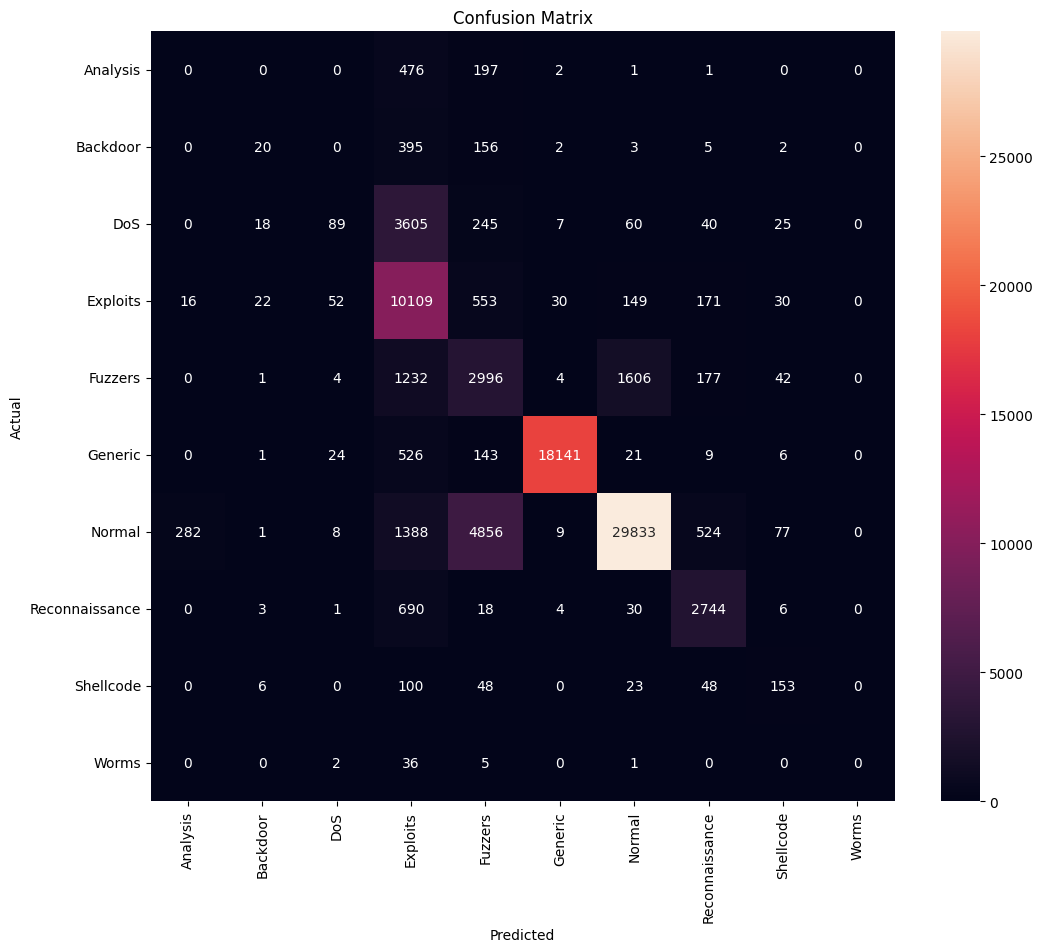

Generating synthetic data for category: DoS
Metadata error for DoS: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: Reconnaissance
Metadata error for Reconnaissance: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: Analysis
Metadata error for Analysis: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: Backdoor
Metadata error for Backdoor: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: Shellcode
Metadata error for Shellcode: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Skipping Worms: not enough samples (175.32500000000002) for synthetic generation.
No synthetic data generated.
number of classes: 10
Loss function: Cross Entropy
Epoc

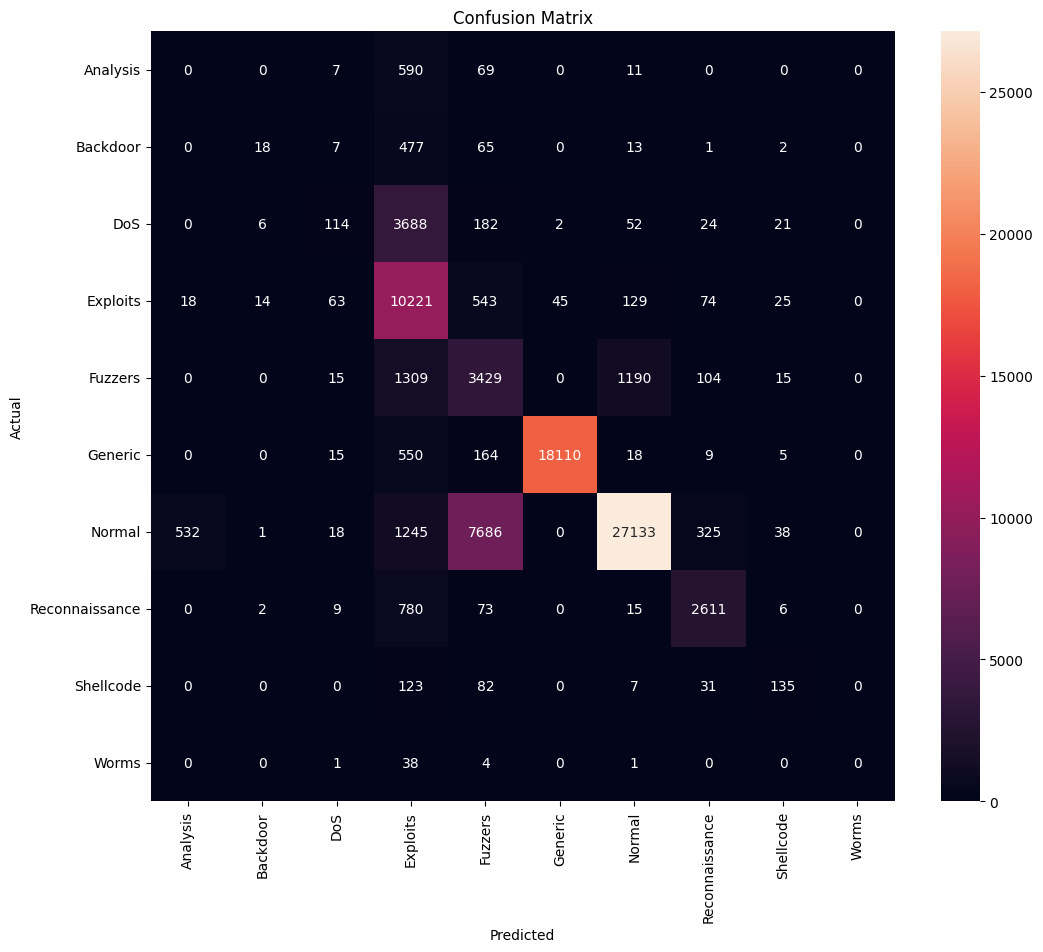

Generating synthetic data for category: DoS
Generating synthetic data for category: Reconnaissance
Generating synthetic data for category: Analysis
Generating synthetic data for category: Backdoor
Generating synthetic data for category: Shellcode
Generating synthetic data for category: Worms
Size of synthetic data: (62236, 41)
number of classes: 10
Loss function: Cross Entropy
Epoch 1/15, Loss: 0.7417
Epoch 2/15, Loss: 0.5518
Epoch 3/15, Loss: 0.5001
Epoch 4/15, Loss: 0.4709
Epoch 5/15, Loss: 0.4527
Epoch 6/15, Loss: 0.4404
Epoch 7/15, Loss: 0.4317
Epoch 8/15, Loss: 0.4244
Epoch 9/15, Loss: 0.4176
Epoch 10/15, Loss: 0.4134
Epoch 11/15, Loss: 0.4089
Epoch 12/15, Loss: 0.4055
Epoch 13/15, Loss: 0.4015
Epoch 14/15, Loss: 0.3977
Epoch 15/15, Loss: 0.3956

Test Accuracy: 73.39%

Classification Report:
                precision    recall  f1-score   support

      Analysis       0.00      0.01      0.00       677
      Backdoor       0.05      0.03      0.04       583
           DoS       0.

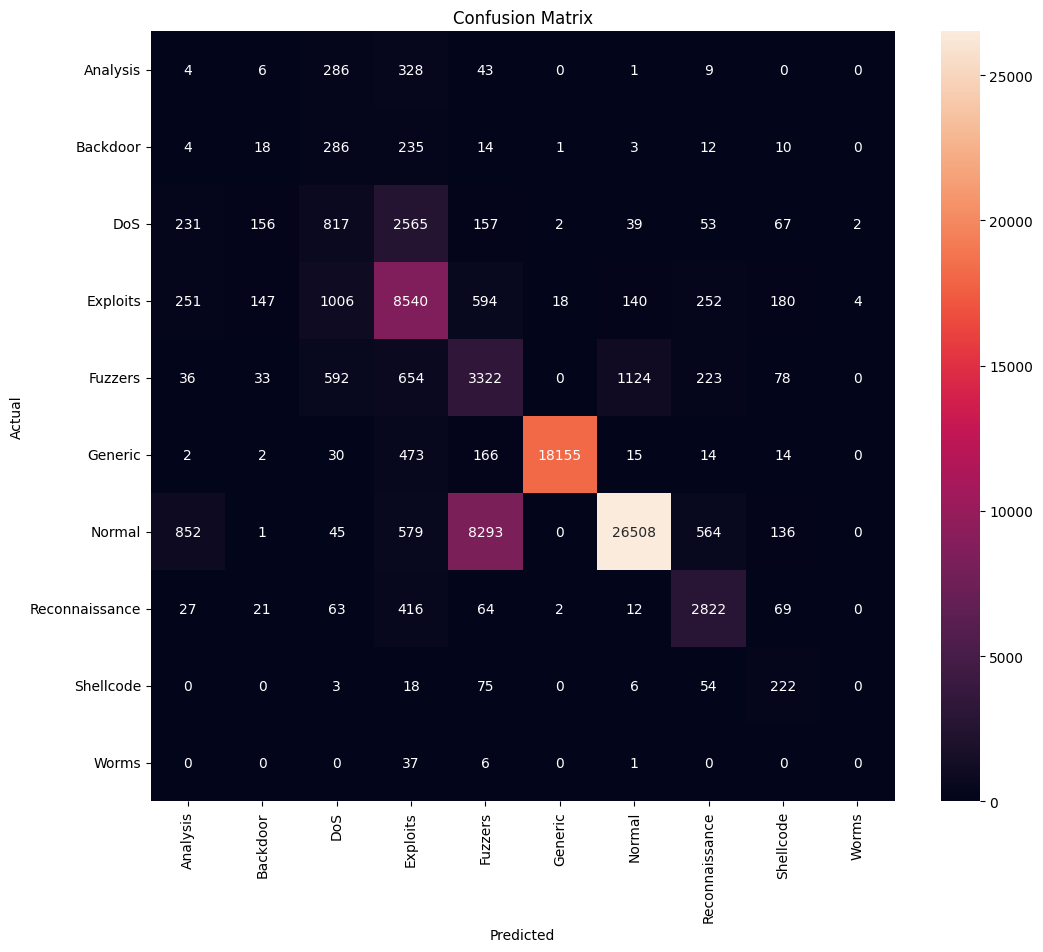

In [8]:
dataset = "UNSW-NB15"                       # "UNSW-NB15" is smaller, "NF-ToN-IoT-v1" is larger
target_variable = 'Attack'                  #  "Label" for binary, "Attack" for multi class
augmentor_ctgan = CTGANAugmentor()
augmentor_ctgan.minority_threshold = 15000

augmentor_tvae = TVAEAugmentor()
augmentor_tvae.minority_threshold = 15000

augmentors = [None, augmentor_ctgan, augmentor_tvae] 
model_type = DeeperNetworkAnomalyDetector   # NetworkAnomalyDetector, DeeperNetworkAnomalyDetector

X_train, X_test, y_train, y_test = load_data(dataset, target_variable)

for augmentor in augmentors:
    X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = make_synthetic_data(
        X_train,
        y_train,
        X_test,
        y_test, 
        target_variable, 
        gan_augmentor=augmentor, 
    )

    model_tvae = train_and_evaluate_model(
        X_train_tvae, 
        y_train_tvae, 
        X_test_tvae, 
        y_test_tvae, 
        le_target,
        model=model_type
    )

# NF-ToN-IoT-v1 Dataset

## Binary

No GAN augmentor specified. Using original data.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.0476
Epoch 2/15, Loss: 0.0409
Epoch 3/15, Loss: 0.0398
Epoch 4/15, Loss: 0.0389
Epoch 5/15, Loss: 0.0360
Epoch 6/15, Loss: 0.0289
Epoch 7/15, Loss: 0.0280
Epoch 8/15, Loss: 0.0272
Epoch 9/15, Loss: 0.0268
Epoch 10/15, Loss: 0.0262
Epoch 11/15, Loss: 0.0265
Epoch 12/15, Loss: 0.0255
Epoch 13/15, Loss: 0.0253
Epoch 14/15, Loss: 0.0251
Epoch 15/15, Loss: 0.0244

Test Accuracy: 99.25%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     59636
           1       0.99      1.00      1.00    287763

    accuracy                           0.99    347399
   macro avg       0.99      0.98      0.99    347399
weighted avg       0.99      0.99      0.99    347399



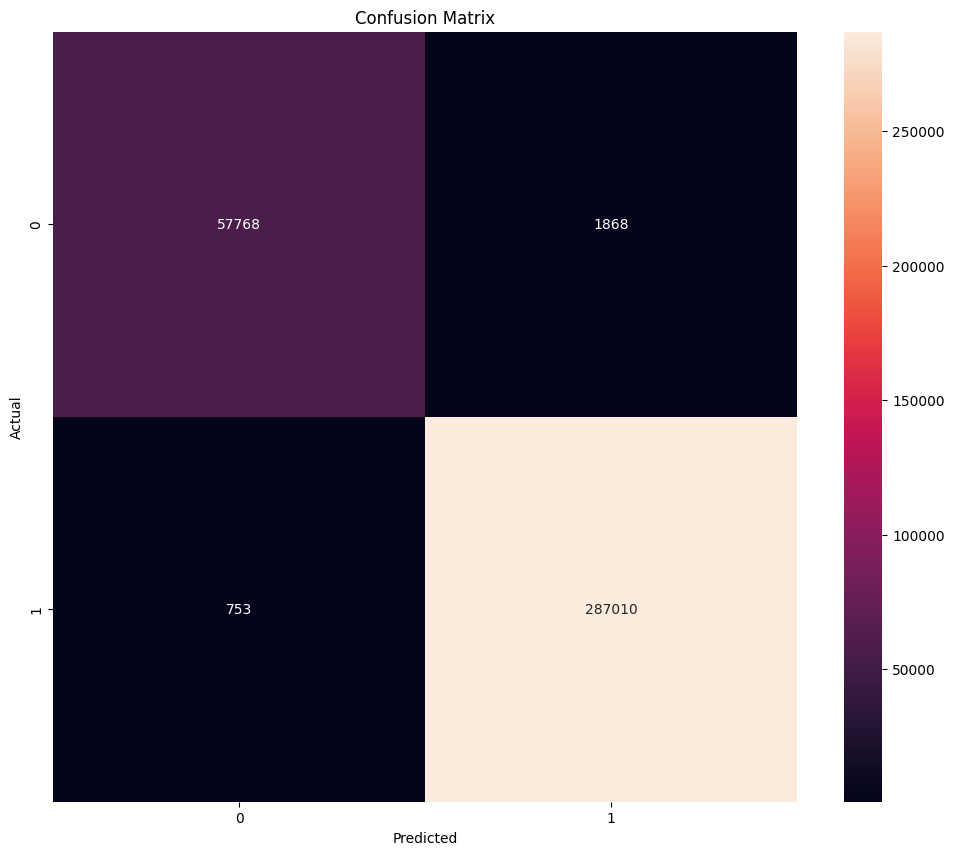

Generating synthetic data for category: 0
Metadata error for 0: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
No synthetic data generated.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.0481
Epoch 2/15, Loss: 0.0409
Epoch 3/15, Loss: 0.0397
Epoch 4/15, Loss: 0.0380
Epoch 5/15, Loss: 0.0299
Epoch 6/15, Loss: 0.0284
Epoch 7/15, Loss: 0.0273
Epoch 8/15, Loss: 0.0272
Epoch 9/15, Loss: 0.0263
Epoch 10/15, Loss: 0.0261
Epoch 11/15, Loss: 0.0257
Epoch 12/15, Loss: 0.0255
Epoch 13/15, Loss: 0.0252
Epoch 14/15, Loss: 0.0246
Epoch 15/15, Loss: 0.0247

Test Accuracy: 99.22%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     59636
           1       0.99      1.00      1.00    287763

    accuracy                           0.99    347399
   macro avg       0.99      0.98      0.99    347399
weighted avg       0.99      0.99      0.99    347

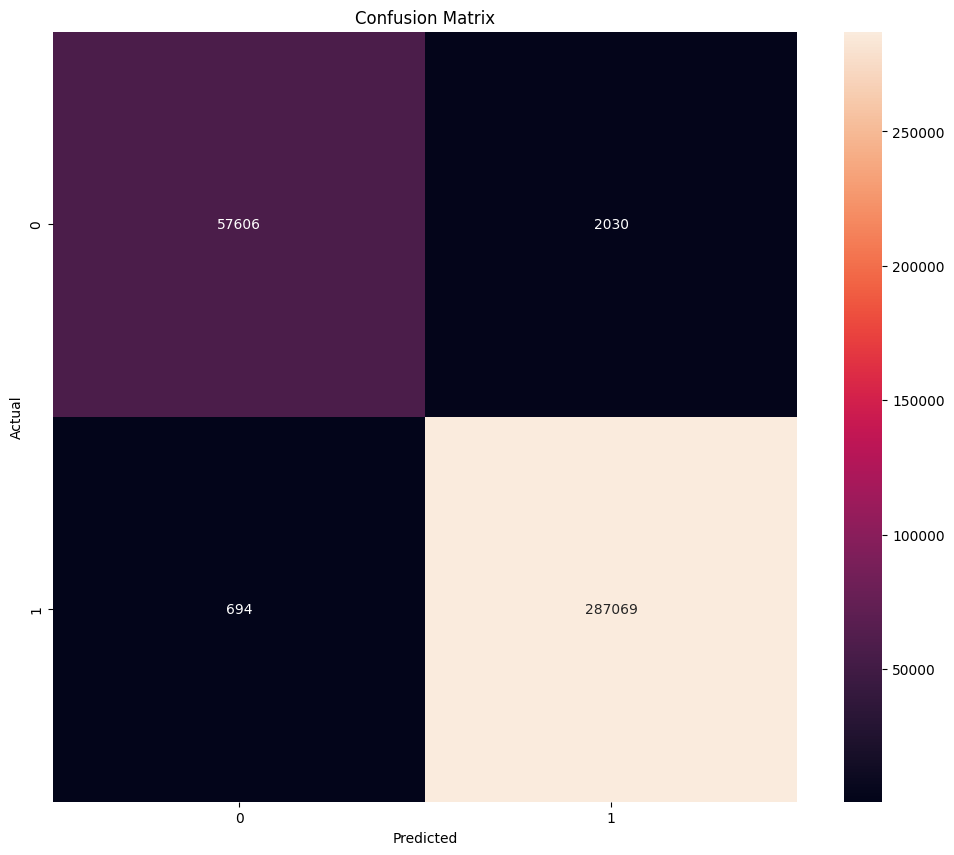

Generating synthetic data for category: 0
Metadata error for 0: Invalid sdtype: 'integer' is not recognized. Please use one of the supported SDV sdtypes.
No synthetic data generated.
number of classes: 2
Loss function: Binary Cross Entropy with Logits
Epoch 1/15, Loss: 0.0469
Epoch 2/15, Loss: 0.0407
Epoch 3/15, Loss: 0.0397
Epoch 4/15, Loss: 0.0393
Epoch 5/15, Loss: 0.0385
Epoch 6/15, Loss: 0.0361
Epoch 7/15, Loss: 0.0291
Epoch 8/15, Loss: 0.0272
Epoch 9/15, Loss: 0.0272
Epoch 10/15, Loss: 0.0260
Epoch 11/15, Loss: 0.0253
Epoch 12/15, Loss: 0.0252
Epoch 13/15, Loss: 0.0250
Epoch 14/15, Loss: 0.0246
Epoch 15/15, Loss: 0.0249

Test Accuracy: 99.21%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.96      0.98     59636
           1       0.99      1.00      1.00    287763

    accuracy                           0.99    347399
   macro avg       0.99      0.98      0.99    347399
weighted avg       0.99      0.99      0.99    3

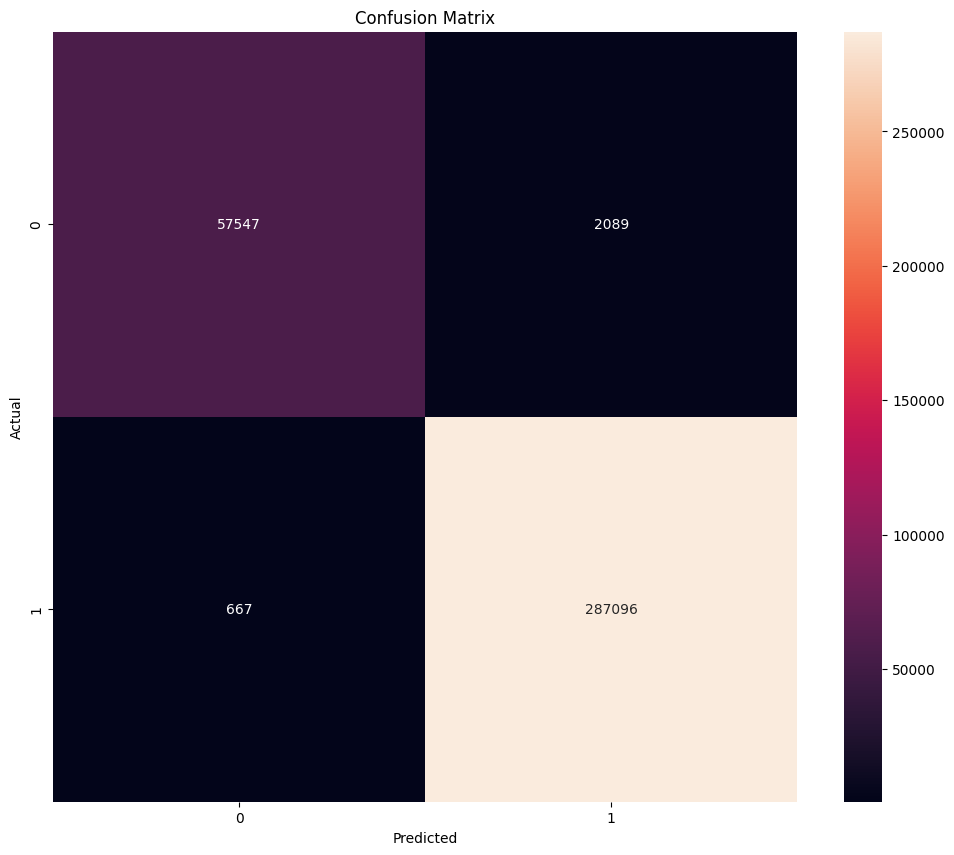

In [9]:
dataset = "NF-ToN-IoT-v1"                   # "UNSW-NB15" is smaller, "NF-ToN-IoT-v1" is larger
target_variable = 'Label'                   #  "Label" for binary, "Attack" for multi class
augmentor_ctgan = CTGANAugmentor()
augmentor_ctgan.minority_threshold = 250000

augmentor_tvae = TVAEAugmentor()
augmentor_tvae.minority_threshold = 250000

augmentors = [None, augmentor_ctgan, augmentor_tvae] 
model_type = DeeperNetworkAnomalyDetector           # NetworkAnomalyDetector, DeeperNetworkAnomalyDetector

X_train, X_test, y_train, y_test = load_data(dataset, target_variable)


for augmentor in augmentors:
    X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = make_synthetic_data(
        X_train,
        y_train,
        X_test,
        y_test, 
        target_variable, 
        gan_augmentor=augmentor, 
    )

    model_tvae = train_and_evaluate_model(
        X_train_tvae, 
        y_train_tvae, 
        X_test_tvae, 
        y_test_tvae, 
        le_target,
        model=model_type
    )

## Multiclass

No GAN augmentor specified. Using original data.
number of classes: 10
Loss function: Cross Entropy
Epoch 1/15, Loss: 0.9074
Epoch 2/15, Loss: 0.8624
Epoch 3/15, Loss: 0.8449
Epoch 4/15, Loss: 0.8315
Epoch 5/15, Loss: 0.8236
Epoch 6/15, Loss: 0.8188
Epoch 7/15, Loss: 0.8143
Epoch 8/15, Loss: 0.8100
Epoch 9/15, Loss: 0.8081
Epoch 10/15, Loss: 0.8155
Epoch 11/15, Loss: 0.8046
Epoch 12/15, Loss: 0.8006
Epoch 13/15, Loss: 0.7985
Epoch 14/15, Loss: 0.7963
Epoch 15/15, Loss: 0.7949

Test Accuracy: 67.50%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.98      0.98      0.98     59636
    backdoor       1.00      0.98      0.99      5161
        ddos       0.64      0.69      0.67     59168
         dos       0.25      0.00      0.00      5213
   injection       0.60      0.94      0.73    138108
        mitm       0.57      0.04      0.08       387
    password       0.29      0.01      0.03     43486
  ransomware       0.00      0.00      

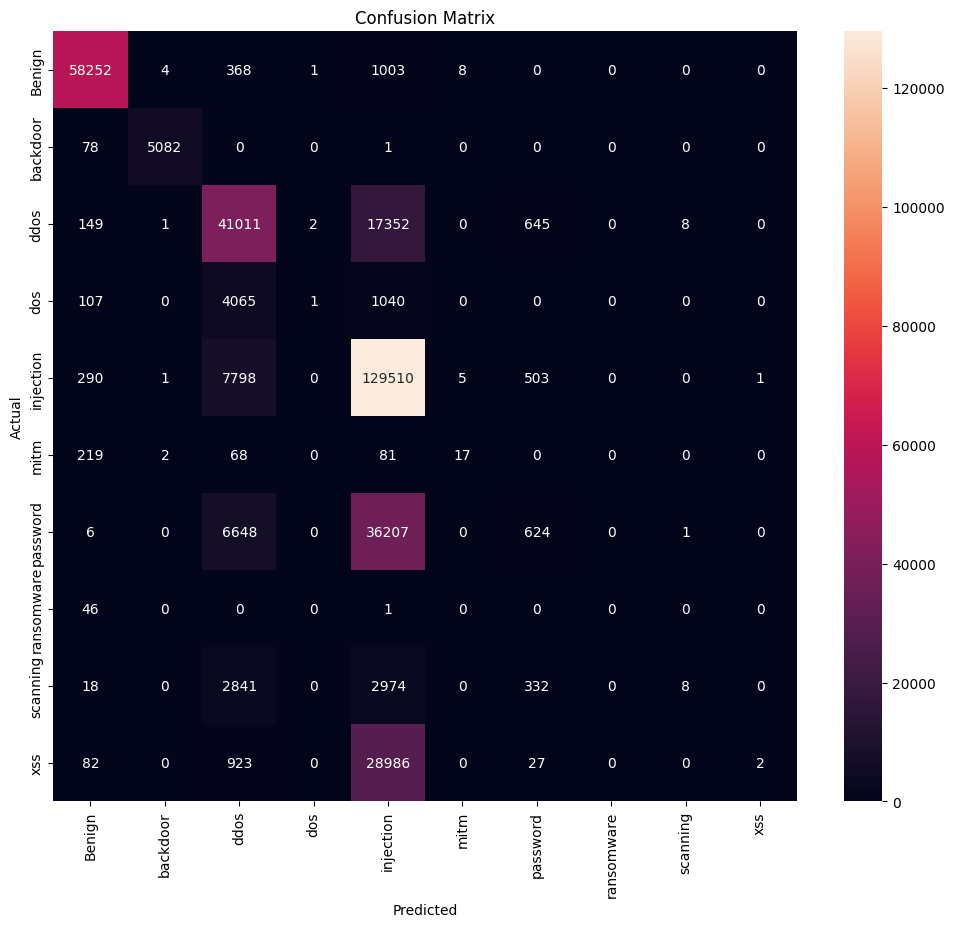

Generating synthetic data for category: scanning
Metadata error for scanning: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: backdoor
Metadata error for backdoor: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: dos
Metadata error for dos: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Generating synthetic data for category: mitm
Metadata error for mitm: Invalid sdtype: 'float' is not recognized. Please use one of the supported SDV sdtypes.
Skipping ransomware: not enough samples (810.595) for synthetic generation.
No synthetic data generated.
number of classes: 10
Loss function: Cross Entropy
Epoch 1/15, Loss: 0.9083
Epoch 2/15, Loss: 0.8650
Epoch 3/15, Loss: 0.8548
Epoch 4/15, Loss: 0.8391
Epoch 5/15, Loss: 0.8230
Epoch 6/15, Loss: 0.8167
Epoch 7/15, Loss: 0.8236
Epoch 8/15, Loss: 0.822

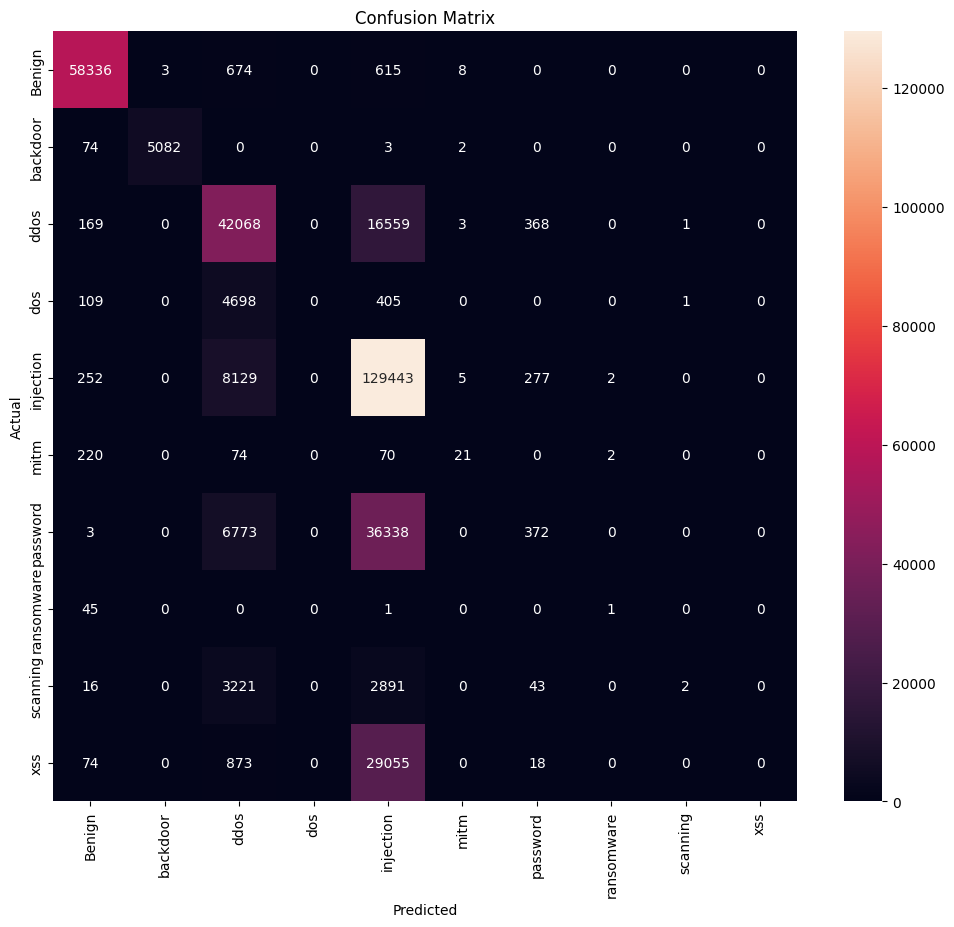

Generating synthetic data for category: scanning
Generating synthetic data for category: backdoor
Generating synthetic data for category: dos
Generating synthetic data for category: mitm
Generating synthetic data for category: ransomware
Size of synthetic data: (210634, 11)
number of classes: 10
Loss function: Cross Entropy
Epoch 1/15, Loss: 0.8719
Epoch 2/15, Loss: 0.8003
Epoch 3/15, Loss: 0.7790
Epoch 4/15, Loss: 0.7673
Epoch 5/15, Loss: 0.7573
Epoch 6/15, Loss: 0.7497
Epoch 7/15, Loss: 0.7409
Epoch 8/15, Loss: 0.7341
Epoch 9/15, Loss: 0.7295
Epoch 10/15, Loss: 0.7295
Epoch 11/15, Loss: 0.7278
Epoch 12/15, Loss: 0.7221
Epoch 13/15, Loss: 0.7181
Epoch 14/15, Loss: 0.7174
Epoch 15/15, Loss: 0.7136

Test Accuracy: 65.95%

Classification Report:
              precision    recall  f1-score   support

      Benign       0.99      0.96      0.97     59636
    backdoor       1.00      0.99      0.99      5161
        ddos       0.71      0.60      0.65     59168
         dos       0.28      

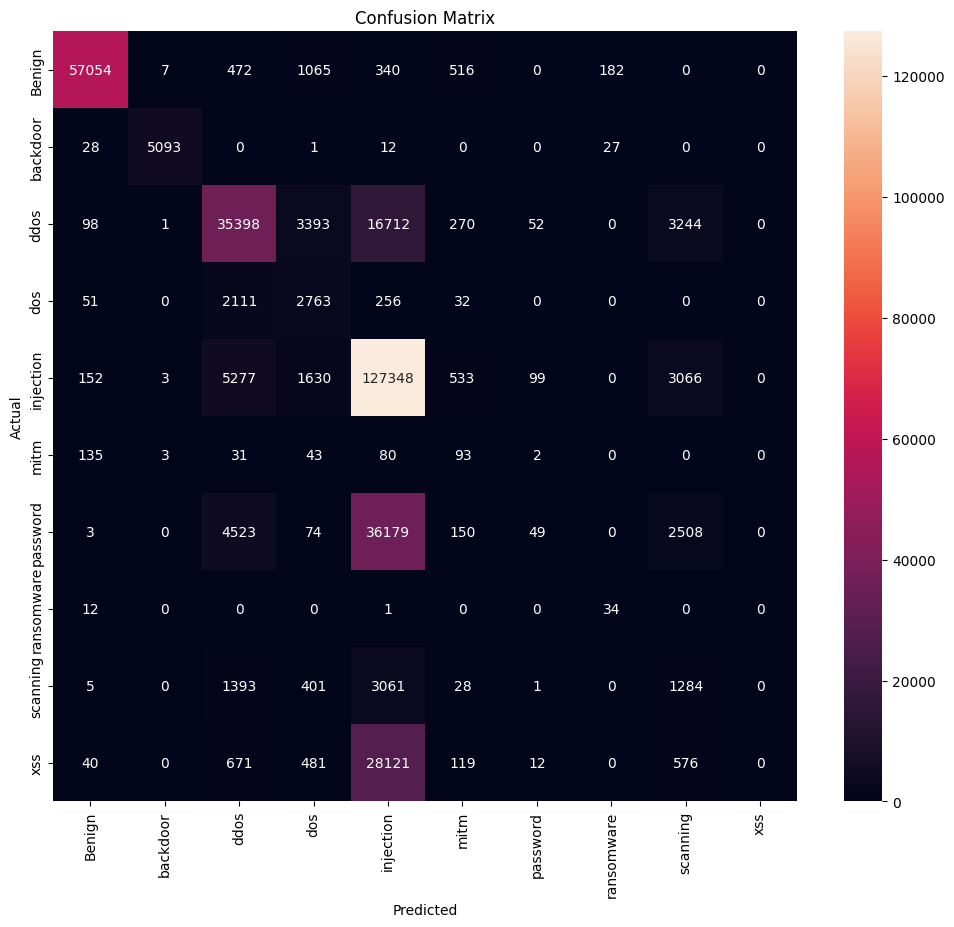

In [11]:
dataset = "NF-ToN-IoT-v1"                   # "UNSW-NB15" is smaller, "NF-ToN-IoT-v1" is larger
target_variable = 'Attack'                  #  "Label" for binary, "Attack" for multi class
augmentor_ctgan = CTGANAugmentor()
augmentor_ctgan.minority_threshold = 50000

augmentor_tvae = TVAEAugmentor()
augmentor_tvae.minority_threshold = 50000

augmentors = [None, augmentor_ctgan, augmentor_tvae] 
model_type = DeeperNetworkAnomalyDetector           # NetworkAnomalyDetector, DeeperNetworkAnomalyDetector

X_train, X_test, y_train, y_test = load_data(dataset, target_variable)

for augmentor in augmentors:
    X_train_tvae, y_train_tvae, X_test_tvae, y_test_tvae, le_target = make_synthetic_data(
        X_train,
        y_train,
        X_test,
        y_test, 
        target_variable, 
        gan_augmentor=augmentor, 
    )

    model_tvae = train_and_evaluate_model(
        X_train_tvae, 
        y_train_tvae, 
        X_test_tvae, 
        y_test_tvae, 
        le_target,
        model=model_type
    )